In [1]:
from plugins.environments.awa_environment import AWAEnvironment
from plugins.interfaces.test_awa_interface import TestAWAInterface

# import data from csv file
import pandas as pd
variable_file = "plugins/environments/awa_variables.csv"
observable_file = "plugins/environments/awa_observables.csv"
variable_info = pd.read_csv(variable_file).set_index("NAME")
observable_info = pd.read_csv(observable_file).set_index("NAME").T

variables = variable_info[["MIN","MAX"]].T.to_dict()
observables = list(observable_info.keys())

for name in variables:
    variables[name] = [variables[name]["MIN"], variables[name]["MAX"]]
observables

['TEST:XRMS',
 'TEST:YRMS',
 'AWAVXI11ICT:Ch1',
 'AWAICTMon:Ch2',
 'AWAICTMon:Ch3',
 'AWAICTMon:Ch4',
 '13ARV1:Cx',
 '13ARV1:Cy',
 '13ARV1:Sx',
 '13ARV1:Sy',
 '13ARV1:penalty']

In [2]:
env = AWAEnvironment(variable_file, observable_file, interface=TestAWAInterface())

In [3]:
from epics import caget_many

In [4]:
img, xsize, ysize = caget_many(["13ARV1:image1:ArrayData","13ARV1:image1:ArraySize0_RBV","13ARV1:image1:ArraySize1_RBV"])

CA.Client.Exception...............................................
    Context: "Channel: "13ARV1:image1:ArrayData", Connecting to: 146.139.52.185:5064, Ignored: awa5:5064"
    Source File: ../cac.cpp line 1320
    Current Time: Thu Jun 15 2023 10:53:27.419139814
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "13ARV1:image1:ArraySize0_RBV", Connecting to: 146.139.52.185:5064, Ignored: awa5:5064"
    Source File: ../cac.cpp line 1320
    Current Time: Thu Jun 15 2023 10:53:27.419205015
..................................................................
"
    Source File: ../cac.cpp line 1320
CA.Client.Exception...............................................
    Context: "Channel: "13ARV1:image1:ArraySize1_RBV", Connecting to: 146.139.52.185:5064, Ignored: awa5:5064"
    Source File: ../cac.cpp line 1320
    Current Time: Thu Jun 15 2023 10:53:27.419251173
........................

In [5]:
img = img.reshape(ysize,xsize)

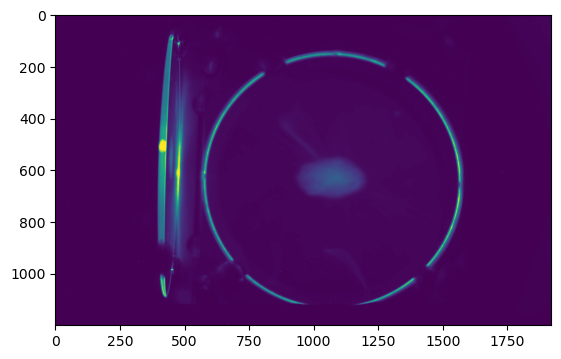

In [6]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [7]:
img

array([[124, 124, 120, ..., 168, 172, 172],
       [120, 120, 124, ..., 176, 168, 172],
       [120, 124, 120, ..., 172, 200, 172],
       ...,
       [120, 120, 120, ..., 120, 120, 124],
       [120, 120, 120, ..., 124, 124, 120],
       [120, 120, 120, ..., 120, 124, 124]], dtype=int16)